# Comparison of Distributions and Repository Selection

This project compares the distribution (stars, age, etc.) of DS repos and Non-DS repos, and selects the final repo ids to include in each set for the rest of the analysis.

Dependencies:
* analyse_py_ver notebook (`ds_version_tab.csv`, `nonds_version_tab.csv`)

Inputs:
* `github_api.csv` (for boa DS repos, and non-DS repos)

Outputs:
* `ds_selected.csv`, `nonds_selected.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from os.path import join

In [2]:
DATA_DIR = "../output/"
NB_OUT = join(DATA_DIR, "notebooks_out")

In [3]:
ds = pd.read_csv("../data/boa/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [4]:
ds_version_tab = pd.read_csv(join(NB_OUT, "ds_version_tab.csv"))
ds = ds.merge(ds_version_tab, how='right', left_on=['id'], right_on=['repo'])
ds = ds[ds["select"]]

In [5]:
ds["age"] = (ds["pushed_at"] - ds["created_at"]) / pd.to_timedelta('1 day')

In [6]:
ds["age"].describe()

count    1049.000000
mean      738.959884
std       536.991999
min         0.000845
25%       367.093125
50%       684.832025
75%       972.859086
max      3953.132014
Name: age, dtype: float64

In [7]:
nonds = pd.read_csv("../data/non-data-science/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [8]:
nonds_version_tab = pd.read_csv(join(NB_OUT, "nonds_version_tab.csv"))
nonds = nonds.merge(nonds_version_tab, how='right', left_on=['id'], right_on=['repo'])
nonds = nonds[nonds["select"]]

In [9]:
nonds.shape

(1751, 23)

In [10]:
dups = set(nonds['id']) & set(ds['id'])

In [11]:
dups

{45234875,
 46626681,
 57161533,
 61362743,
 61609586,
 63605558,
 68609247,
 70118622,
 70908208,
 70934951,
 71932349,
 74622643,
 76228721,
 77440857,
 77765629,
 77904282,
 79006723,
 79404479,
 81608592,
 81784084,
 84209477,
 88441301,
 92446304,
 101607701,
 103471501,
 103934044,
 122806629}

In [12]:
nonds = nonds[~nonds['id'].isin(dups)]

In [13]:
nonds.shape

(1724, 23)

In [14]:
nonds["age"] = (nonds["pushed_at"] - nonds["created_at"]) / pd.to_timedelta('1 day')

In [15]:
nonds["age"].describe()

count    1724.000000
mean      973.242059
std       489.156851
min      -392.995961
25%       643.727188
50%      1042.548906
75%      1384.597080
max      1714.908426
Name: age, dtype: float64

In [16]:
nonds[nonds["age"] < 0]

,id,name,full_name,url,html_url,stars,created_at,updated_at,pushed_at,size,...,description,number_of_contributors,repo,either,neither,python2,python3,summary,select,age
411,222271895,assertpy,ActivisionGameScience/assertpy,https://api.github.com/repos/ActivisionGameSci...,https://github.com/ActivisionGameScience/assertpy,7,2019-11-17 15:47:15+00:00,2020-02-11 18:48:58+00:00,2019-11-09 12:14:38+00:00,476,...,Simple assertion library for unit testing in p...,8,222271895,46.0,0.0,0.0,0.0,either,True,-8.147650
1144,124575530,openFEC,18F/openFEC,https://api.github.com/repos/18F/openFEC,https://github.com/18F/openFEC,4,2018-03-09 18:00:20+00:00,2020-01-18 20:35:05+00:00,2018-03-09 17:24:06+00:00,385360,...,MOVED TO:https://github.com/fecgov/openFEC,30,124575530,103.0,0.0,0.0,3.0,only3,True,-0.025162
1358,91115384,celery-once,TrackMaven/celery-once,https://api.github.com/repos/TrackMaven/celery...,https://github.com/TrackMaven/celery-once,15,2017-05-12 17:39:08+00:00,2020-02-26 11:54:40+00:00,2016-04-14 17:44:57+00:00,455,...,Celery Once allows you to prevent multiple exe...,6,91115384,9.0,0.0,0.0,0.0,either,True,-392.995961
1372,149551898,flare-game,clintbellanger/flare-game,https://api.github.com/repos/clintbellanger/fl...,https://github.com/clintbellanger/flare-game,22,2018-09-20 04:37:30+00:00,2020-02-21 14:47:38+00:00,2018-09-17 20:30:00+00:00,848988,...,Fantasy action RPG using the FLARE engine,30,149551898,4.0,0.0,0.0,0.0,either,True,-2.338542
1383,110242469,pyusb,walac/pyusb,https://api.github.com/repos/walac/pyusb,https://github.com/walac/pyusb,78,2017-11-10 12:01:29+00:00,2020-02-29 02:28:50+00:00,2017-11-10 11:25:49+00:00,976,...,USB access on python,30,110242469,25.0,0.0,0.0,0.0,either,True,-0.024769
1718,209307698,check_mk_frank-fegert,HeinleinSupport/check_mk_frank-fegert,https://api.github.com/repos/HeinleinSupport/c...,https://github.com/HeinleinSupport/check_mk_fr...,1,2019-09-18 12:51:54+00:00,2020-01-08 12:59:19+00:00,2019-02-24 14:51:16+00:00,235,...,checkmk extensions from frank-fegert,1,209307698,29.0,0.0,0.0,0.0,either,True,-205.917106
2052,92822405,sentinelsat,cenima-ibama/sentinelsat,https://api.github.com/repos/cenima-ibama/sent...,https://github.com/cenima-ibama/sentinelsat,13,2017-05-30 10:37:47+00:00,2020-03-03 19:21:55+00:00,2017-05-29 12:08:22+00:00,1797,...,Utility to access the API of Copernicus Sentin...,6,92822405,11.0,0.0,0.0,0.0,either,True,-0.937095
2224,207705426,calc,18F/calc,https://api.github.com/repos/18F/calc,https://github.com/18F/calc,1,2019-09-11 02:28:56+00:00,2020-02-29 10:22:50+00:00,2019-09-09 19:45:08+00:00,35195,...,An estimator for hourly rates on professional ...,29,207705426,207.0,0.0,0.0,56.0,only3,True,-1.280417
2415,241142684,pg_activity_fork,julmon/pg_activity_fork,https://api.github.com/repos/julmon/pg_activit...,https://github.com/julmon/pg_activity_fork,1,2020-02-17 15:33:13+00:00,2020-02-25 13:57:20+00:00,2020-02-15 07:01:25+00:00,1226,...,WARNING: Personal fork. pg_activity repository...,22,241142684,5.0,0.0,0.0,0.0,either,True,-2.355417


Some non-DS repos had a negative age (i.e. repo reported as created on github prior to the first push). As these appear to be forks (which should have been excluded), we remove them from the analysis. 

In [17]:
nonds = nonds[nonds["age"] >= 0]

In [18]:
nonds["age"].describe()

count    1715.000000
mean      978.707482
std       484.474051
min         0.000104
25%       651.542569
50%      1046.085648
75%      1385.325608
max      1714.908426
Name: age, dtype: float64

In [19]:
ds["id"].to_csv(join(NB_OUT, "ds_selected.csv"), index=False)

## Analyse Language

In [20]:
ds["language"].value_counts() / ds.shape[0]

Python              0.981888
Jupyter Notebook    0.010486
HTML                0.001907
JavaScript          0.001907
Jsonnet             0.000953
Perl                0.000953
C++                 0.000953
C#                  0.000953
Name: language, dtype: float64

In [21]:
ds.shape

(1049, 24)

In [22]:
nonds["language"].value_counts() / nonds.shape[0]

Python              0.939942
Jupyter Notebook    0.015743
JavaScript          0.010496
HTML                0.006414
Shell               0.005248
C++                 0.002332
C                   0.002332
CSS                 0.001749
Go                  0.001749
Java                0.001166
C#                  0.001166
YARA                0.001166
Smarty              0.000583
PLpgSQL             0.000583
Dockerfile          0.000583
TeX                 0.000583
Roff                0.000583
Lua                 0.000583
Rust                0.000583
Vim script          0.000583
PowerShell          0.000583
Tcl                 0.000583
PHP                 0.000583
TypeScript          0.000583
Kotlin              0.000583
Name: language, dtype: float64

## Select Recent

In [23]:
#created_thresh = pd.to_datetime('2015-07-01T00:00Z')
created_thresh = pd.to_datetime('2016-01-01T00:00Z')
created_thresh

Timestamp('2016-01-01 00:00:00+0000', tz='UTC')

In [24]:
nonds_sel = nonds[nonds["created_at"] >= created_thresh]
nonds_sel

,id,name,full_name,url,html_url,stars,created_at,updated_at,pushed_at,size,...,description,number_of_contributors,repo,either,neither,python2,python3,summary,select,age
0,103890505,mythril,ConsenSys/mythril,https://api.github.com/repos/ConsenSys/mythril,https://github.com/ConsenSys/mythril,1332,2017-09-18 04:14:20+00:00,2020-03-05 06:22:15+00:00,2020-03-11 18:27:50+00:00,53149,...,Security analysis tool for EVM bytecode. Suppo...,30,103890505,97.0,0.0,0.0,88.0,only3,True,905.592708
1,101479803,debops,debops/debops,https://api.github.com/repos/debops/debops,https://github.com/debops/debops,596,2017-08-26 10:46:25+00:00,2020-03-11 09:06:12+00:00,2020-03-10 14:43:18+00:00,27105,...,DebOps - Your Debian-based data center in a box,30,101479803,33.0,0.0,0.0,0.0,either,True,927.164502
4,117024856,adversarial_image_defenses,facebookarchive/adversarial_image_defenses,https://api.github.com/repos/facebookarchive/a...,https://github.com/facebookarchive/adversarial...,412,2018-01-10 23:41:15+00:00,2020-03-02 02:14:28+00:00,2019-01-25 03:24:05+00:00,646,...,Countering Adversarial Image using Input Trans...,4,117024856,33.0,0.0,0.0,0.0,either,True,379.154745
9,76993446,SublimeTextSwiftAutocomplete,Dan2552/SublimeTextSwiftAutocomplete,https://api.github.com/repos/Dan2552/SublimeTe...,https://github.com/Dan2552/SublimeTextSwiftAut...,160,2016-12-20 21:37:08+00:00,2020-01-14 02:14:17+00:00,2018-02-16 22:13:54+00:00,918,...,Swift autocompletion in Sublime Text using Sou...,2,76993446,14.0,0.0,0.0,0.0,either,True,423.025532
10,116679937,MillionHeroAssistant,smileboywtu/MillionHeroAssistant,https://api.github.com/repos/smileboywtu/Milli...,https://github.com/smileboywtu/MillionHeroAssi...,525,2018-01-08 13:26:04+00:00,2020-03-09 03:42:28+00:00,2020-01-08 09:39:27+00:00,69575,...,百万 / 冲顶 / 芝士 / UC / 万能 答题助手（知识图谱更加专业，自动推荐答案， ...,6,116679937,19.0,0.0,0.0,0.0,either,True,729.842627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,153622703,zarr-python,alimanfoo/zarr-python,https://api.github.com/repos/alimanfoo/zarr-py...,https://github.com/alimanfoo/zarr-python,3,2018-10-18 12:47:47+00:00,2019-08-12 16:15:00+00:00,2019-08-13 14:57:18+00:00,12743,...,"An implementation of chunked, compressed, N-di...",17,153622703,33.0,0.0,0.0,0.0,either,True,299.089942
2409,80370897,Pytorch-Tutorials,alexis-jacq/Pytorch-Tutorials,https://api.github.com/repos/alexis-jacq/Pytor...,https://github.com/alexis-jacq/Pytorch-Tutorials,133,2017-01-29 20:35:36+00:00,2020-02-08 21:00:22+00:00,2018-11-05 16:55:54+00:00,6788,...,Pytorch tutorials for Neural Style transfert,2,80370897,1.0,0.0,0.0,0.0,either,True,644.847431
2411,59060289,leather,wireservice/leather,https://api.github.com/repos/wireservice/leather,https://github.com/wireservice/leather,283,2016-05-17 21:26:25+00:00,2020-02-19 20:44:32+00:00,2020-02-05 17:48:05+00:00,331,...,Python charting for 80% of humans.,1,59060289,60.0,0.0,0.0,0.0,either,True,1358.848380
2412,90824610,pytorch-classification,bearpaw/pytorch-classification,https://api.github.com/repos/bearpaw/pytorch-c...,https://github.com/bearpaw/pytorch-classification,953,2017-05-10 05:33:36+00:00,2020-03-11 08:54:13+00:00,2019-12-12 21:55:36+00:00,438,...,Classification with PyTorch.,4,90824610,18.0,0.0,0.0,0.0,either,True,946.681944


In [25]:
nonds_sel["age"].describe()

count    1177.000000
mean      855.995208
std       429.138838
min         0.000347
25%       560.838241
50%       921.918623
75%      1197.569491
max      1529.408542
Name: age, dtype: float64

In [26]:
nonds = nonds_sel

In [27]:
nonds["id"].to_csv(join(NB_OUT, "nonds_selected.csv"), index=False)

## Rerun Analysis

In [28]:
def plot_all_log(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    ks = stats.ks_2samp(xs1, xs2) # calculate before any manipulation
    
    stats.ks_2samp(xs1, xs2)
    # Can't plot 0 on a log scale. So replace 0 (and NaN) with 0.9
    MIN = 0.9
    xs1 = np.where(xs1 > MIN, xs1, MIN)
    xs2 = np.where(xs2 > MIN, xs2, MIN)
    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    logbins = np.logspace(np.log10(start),np.log10(end)+0.001,1000)
    
    plt.hist(xs1, bins=logbins, density=True, histtype='step', cumulative=-1, label='ds')
    plt.hist(xs2, bins=logbins, density=True, histtype='step', cumulative=-1, label='non-ds', ls='--')
    plt.xscale('log')
    #plt.title(dim)
    plt.xlabel(dim.replace('_', ' '))
    plt.xlim(start, end)
    plt.ylabel('survival (1 - CDF)')
    plt.legend(loc='upper right')
    plt.savefig(join(NB_OUT, dim + '-cdf-cutoff-log.png'), dpi=300)
    plt.show()
    
    return ks

In [29]:
def plot_all_lin(dim, unit=''):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    linbins = np.linspace(start, end+0.001,1000)
    
    # adapted from https://matplotlib.org/3.1.1/gallery/statistics/histogram_cumulative.html
    plt.hist(xs1, bins=linbins, density=True, histtype='step', cumulative=-1, label='ds')
    plt.hist(xs2, bins=linbins, density=True, histtype='step', cumulative=-1, label='non-ds', ls='--')
    #plt.title(dim)
    plt.xlabel(dim.replace('_', ' ') + unit)
    plt.xlim(start, end)
    plt.ylabel('survival (1 - CDF)')
    plt.legend(loc='upper right')
    plt.savefig(join(NB_OUT, dim + '-cdf-cutoff.png'), dpi=300)
    plt.show()
    
    return stats.ks_2samp(xs1, xs2)

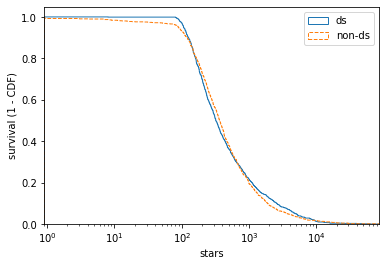

Ks_2sampResult(statistic=0.05569166896822073, pvalue=0.06096230212211173)


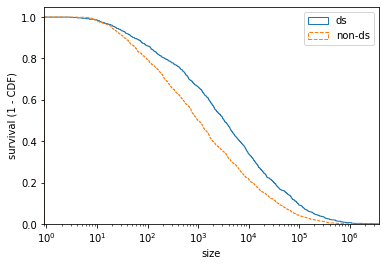

Ks_2sampResult(statistic=0.17634223798528031, pvalue=3.552713678800501e-15)


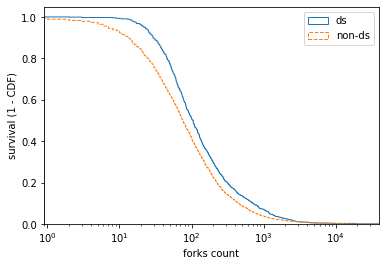

Ks_2sampResult(statistic=0.15691928146156917, pvalue=2.157385381451604e-12)


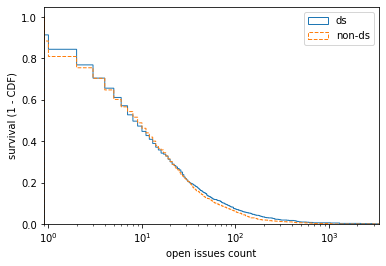

Ks_2sampResult(statistic=0.03482460538134389, pvalue=0.4969856928232568)


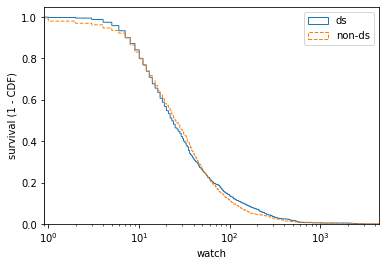

Ks_2sampResult(statistic=0.041154216541545816, pvalue=0.29365910080026736)


In [30]:
dims = ['stars', 'size', 'forks_count', 'open_issues_count', 'watch']
for dim in dims:
    print(plot_all_log(dim))

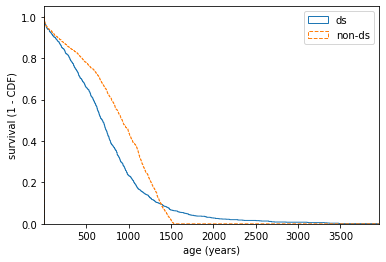

Ks_2sampResult(statistic=0.2203676601010956, pvalue=2.1094237467877974e-15)

In [31]:
plot_all_lin('age', ' (years)')

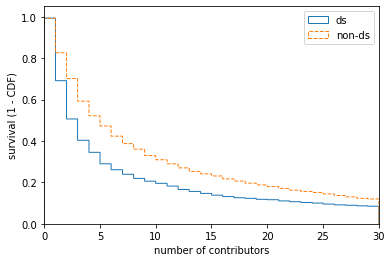

Ks_2sampResult(statistic=0.1955878196089167, pvalue=2.1094237467877974e-15)

In [32]:
plot_all_lin('number_of_contributors')